In [1]:
import glob, os, json, re, unicodedata
from bs4 import BeautifulSoup


load_verbose = 0
loaded_labels = []
loaded_text = []
labels = {"Barack Obama": 0,
          "Donald J. Trump": 1,
          "Dwight D. Eisenhower": 2,
          "Franklin D. Roosevelt": 3,
          "George Bush": 4,
          "George W. Bush": 5,
          "Gerald R. Ford": 6,
          "Harry S. Truman": 7,
          "Herbert Hoover": 8,
          "Jimmy Carter": 9,
          "John F. Kennedy": 10,
          "Lyndon B. Johnson": 11,
          "Richard Nixon": 12,
          "Ronald Reagan": 13,
          "William J. Clinton": 14}

# load raw text files straight in, no parsing
file_to_label = {"Obama": "Barack Obama", 
                     "Trump": "Donald J. Trump",
                     "Eisenhower": "Dwight D. Eisenhower",
                     "Roosevelt": "Franklin D. Roosevelt",
                     "Bush": "George Bush",
                     "WBush": "George W. Bush",
                     "Ford": "Gerald R. Ford",
                     "Truman": "Harry S. Truman",
                     "Hoover": "Herbert Hoover",
                     "Carter": "Jimmy Carter",
                     "Kennedy": "John F. Kennedy",
                     "Johnson": "Lyndon B. Johnson",
                     "Nixon": "Richard Nixon",
                     "Reagan": "Ronald Reagan",
                     "Clinton": "William J. Clinton"
                    }

directory = "../data/processed/"
for filename in glob.glob(os.path.join(directory, '*.txt')):
        arr = filename.replace(directory,'').split("_")
        loaded_labels = loaded_labels + [labels[file_to_label[arr[0]]]]
        raw = open(filename).read().decode("UTF-8").encode("ascii","ignore")
        loaded_text = loaded_text + [raw] 

print "Loaded", len(loaded_text), "speeches for", len(set(loaded_labels)), "presidents."
# processed2 now contains files generated from unprocessed
directory = "../data/processed3/"
for filename in glob.glob(os.path.join(directory, '*.txt')):
        arr = filename.replace(directory,'').split("_")
        loaded_labels = loaded_labels + [labels[file_to_label[arr[0]]]]
        raw = open(filename).read().decode("UTF-8").encode("ascii","ignore")
        loaded_text = loaded_text + [raw] 


print "Loaded", len(loaded_text), "speeches for", len(set(loaded_labels)), "presidents."

Loaded 25 speeches for 2 presidents.
Loaded 1742 speeches for 15 presidents.


In [2]:
import numpy as np

# summary stats & chop up into smaller
#print "Loaded", len(input_text), "speeches for", len(set(input_labels)), "presidents."

print "\nHow many speeches per president?"
speech_freq = np.bincount(loaded_labels)
for key, value in sorted(labels.iteritems()):
    print str(value).ljust(2), ":", key.ljust(20), "\t", speech_freq[value]
  
print "\nApproximately many words of text per president?"
for key, value in sorted(labels.iteritems()):
    label_set = [cnt for cnt, idx in enumerate(loaded_labels) if idx == value]
    label_speeches = [loaded_text[i] for i in label_set]
    print str(value).ljust(2), ":", key.ljust(20), "\t", sum(len(speech.split()) for speech in label_speeches)

print "\nApproximately how many average words per speech per president?"
for key, value in sorted(labels.iteritems()):
    label_set = [cnt for cnt, idx in enumerate(loaded_labels) if idx == value]
    label_speeches = [loaded_text[i] for i in label_set]
    print str(value).ljust(2), ":", key.ljust(20), "\t", (sum(len(speech.split()) for speech in label_speeches)) / speech_freq[value]



How many speeches per president?
0  : Barack Obama         	148
1  : Donald J. Trump      	17
2  : Dwight D. Eisenhower 	192
3  : Franklin D. Roosevelt 	223
4  : George Bush          	97
5  : George W. Bush       	54
6  : Gerald R. Ford       	40
7  : Harry S. Truman      	301
8  : Herbert Hoover       	267
9  : Jimmy Carter         	59
10 : John F. Kennedy      	63
11 : Lyndon B. Johnson    	134
12 : Richard Nixon        	39
13 : Ronald Reagan        	46
14 : William J. Clinton   	62

Approximately many words of text per president?
0  : Barack Obama         	860411
1  : Donald J. Trump      	80444
2  : Dwight D. Eisenhower 	574752
3  : Franklin D. Roosevelt 	386250
4  : George Bush          	352287
5  : George W. Bush       	315242
6  : Gerald R. Ford       	126853
7  : Harry S. Truman      	389590
8  : Herbert Hoover       	158362
9  : Jimmy Carter         	225459
10 : John F. Kennedy      	241563
11 : Lyndon B. Johnson    	422401
12 : Richard Nixon        	178060
13 : Ronald Reagan

In [3]:
import nltk.data
from scipy import stats

# parse speeches into sentences and see what we have
input_text = []
input_labels = []

sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
for idx in range(0,len(loaded_text)):
    speech = loaded_text[idx]
    label = loaded_labels[idx]
    parsed_sentences = sent_detector.tokenize(speech.strip())
    input_text = input_text + parsed_sentences
    input_labels = input_labels + ([label]*len(parsed_sentences))

print "Parsed ", len(input_text), "sentences, applying", len(input_labels), "labels."

print "\nHow many sentences of text per president?"
sentence_label_count = np.bincount(input_labels)
for key, value in sorted(labels.iteritems()):
    print str(value).ljust(2), ":", key.ljust(20), "\t", sentence_label_count[value]

print "\nSummary stats of sentence counts"
print stats.describe(sentence_label_count)

max_sentence_len_char = len(max(input_text, key=len))
max_sentence_len_word = len(max(input_text, key=len).split())

print "\nMaximum sentence length (characters):", max_sentence_len_char
print "Maximum sentence length (words):", max_sentence_len_word
print "\nLongest sentence:", max(input_text, key=len)

Parsed  295135 sentences, applying 295135 labels.

How many sentences of text per president?
0  : Barack Obama         	44053
1  : Donald J. Trump      	6878
2  : Dwight D. Eisenhower 	29808
3  : Franklin D. Roosevelt 	25746
4  : George Bush          	24531
5  : George W. Bush       	22088
6  : Gerald R. Ford       	7341
7  : Harry S. Truman      	42105
8  : Herbert Hoover       	6818
9  : Jimmy Carter         	12015
10 : John F. Kennedy      	12249
11 : Lyndon B. Johnson    	25529
12 : Richard Nixon        	8263
13 : Ronald Reagan        	10407
14 : William J. Clinton   	17304

Summary stats of sentence counts
DescribeResult(nobs=15, minmax=(6818, 44053), mean=19675.666666666668, variance=151240330.52380955, skewness=0.7198727252583906, kurtosis=-0.5640935037360788)

Maximum sentence length (characters): 1364
Maximum sentence length (words): 245

Longest sentence: And throughout this process, based on hours of meetingsif you tallied it up, days or weeks of meetings where we went throu

In [4]:
# adjust sentence volumes 
from operator import itemgetter 

# approach here is too simplistic but it suffices for now:
#   If <= threshold, take all; else just pick first threshold # of sentences sentences

sentence_max_threshold = 7500

trimmed_text = []
trimmed_labels = []
sentence_label_count = np.bincount(input_labels)

for key, value in sorted(labels.iteritems()):
    # grab all values of a specific label
    subset_text = list(itemgetter(*[idx for idx, label in enumerate(input_labels) if label == value ])(input_text))
    subset_labels = list(itemgetter(*[idx for idx, label in enumerate(input_labels) if label == value ])(input_labels))

    if sentence_label_count[value] <= sentence_max_threshold:
        print str(value).ljust(2), ":", key.ljust(20), "\t", "copy", "\t", str(sentence_label_count[value]).ljust(6), "now at:", len(subset_text)
    else:
        subset_text = subset_text[0:sentence_max_threshold]
        subset_labels = subset_labels[0:sentence_max_threshold]
        print str(value).ljust(2), ":", key.ljust(20), "\t", "trim", "\t", str(sentence_label_count[value]).ljust(6), "now at:", len(subset_text)
    trimmed_text = trimmed_text + subset_text
    trimmed_labels = trimmed_labels + subset_labels

# free up some memory
subset_labels = None
subset_text = None

print "\nSentences trimmed from", len(input_text), "to", len(trimmed_text)
print "\nLabels trimmed from", len(input_labels), "to", len(trimmed_labels)

0  : Barack Obama         	trim 	44053  now at: 7500
1  : Donald J. Trump      	copy 	6878   now at: 6878
2  : Dwight D. Eisenhower 	trim 	29808  now at: 7500
3  : Franklin D. Roosevelt 	trim 	25746  now at: 7500
4  : George Bush          	trim 	24531  now at: 7500
5  : George W. Bush       	trim 	22088  now at: 7500
6  : Gerald R. Ford       	copy 	7341   now at: 7341
7  : Harry S. Truman      	trim 	42105  now at: 7500
8  : Herbert Hoover       	copy 	6818   now at: 6818
9  : Jimmy Carter         	trim 	12015  now at: 7500
10 : John F. Kennedy      	trim 	12249  now at: 7500
11 : Lyndon B. Johnson    	trim 	25529  now at: 7500
12 : Richard Nixon        	trim 	8263   now at: 7500
13 : Ronald Reagan        	trim 	10407  now at: 7500
14 : William J. Clinton   	trim 	17304  now at: 7500

Sentences trimmed from 295135 to 111037

Labels trimmed from 295135 to 111037


In [5]:
## USE NLTK Tokenizer instead?

from sklearn.cross_validation import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical

max_words = 15000

tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True, split=" ", char_level=False)
tokenizer.fit_on_texts(trimmed_text)
tokenized_text = tokenizer.texts_to_sequences(trimmed_text)

X = sequence.pad_sequences(tokenized_text, maxlen=max_sentence_len_word)
y = to_categorical(trimmed_labels)

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=45)

print "Prepared training (", len(train_X), "records) and test (", len(test_X), "records) data sets."

/home/thongnbui/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


Prepared training ( 88829 records) and test ( 22208 records) data sets.


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, SimpleRNN, Dropout

max_features = 15000
batch_size = 500

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 100, input_length=max_sentence_len_word))
model.add(Dropout(0.2))
model.add(SimpleRNN(100,input_dim=100,activation='tanh',return_sequences=True))
model.add(SimpleRNN(50,activation='tanh'))
model.add(Dense(15, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adagrad',metrics=['categorical_accuracy'])
print(model.summary())

model.fit(train_X, y=train_y, batch_size=batch_size, nb_epoch=15, verbose=1)

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 245, 100)          1500000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 245, 100)          0         
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 245, 100)          20100     
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 50)                7550      
_________________________________________________________________
dense_3 (Dense)              (None, 15)                765       
Total params: 1,528,415
Trainable params: 1,528,415
Non-trainable params: 0
_________________________________________________________________
None


/home/thongnbui/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/home/thongnbui/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(100, return_sequences=True, activation="tanh", input_shape=(None, 100...)`


Epoch 1/15
88829/88829 [==============================] - 224s - loss: 2.6423 - categorical_accuracy: 0.1254     

In [11]:

# Evaluate performance
print "Evaluating test data..."
loss_and_metrics = model.evaluate(test_X, test_y)
print model.metrics_names
print loss_and_metrics

# Make some predictions
print "\nPredicting using test data..."
pred_y = model.predict(test_X, batch_size=batch_size, verbose=1)
pred_y_collapsed = np.argmax(pred_y, axis=1)
test_y_collapsed = np.argmax(test_y, axis=1)

print "Done prediction."

Evaluating test data...
22208/22208 [==============================] - 39s     

Confusion matrix, without normalization
[[704 104   8  25  74 111  31  55  25  76  43  19  14  57 115]
 [194 637  29  38  48  83  14 109  24  34  26  23  21  45  69]
 [ 18   7 365 103  30  15  49 353  98  48  96  64  92  92  36]
 [ 29  30  92 640  30  43  43 198 208  30  39  68  34  41  24]
 [ 78  33  39  24 382 136  58 195  26  97  39  22  36 172 145]
 [154  65  17  21 139 600  29 136  21  81  10  17  14 102  93]
 [ 30  10  53  18  49  21 362 165  75 259  95  99 140  64  60]
 [ 12  17  54  85  33  23  48 894 107  31  31  79  36  30  24]
 [ 22   6  42  77   9   6  45  83 921  46  40  58  27  20  12]
 [ 77  15  18  14  69  37 201 109  62 577  60  52  51  57  50]
 [ 51   6  87  20  23  13 117 276  76  66 473 105  77  46  77]
 [ 34  21  85  78  26  33 125 197 143 103 125 349  88  49  47]
 [ 17  16  92  28  34  15 112 117  60  77 112  66 636  55  30]
 [ 91  19  91  46 171  52  67 189  37  86  43  33  67 359 139]
 [199  42  58  30 133 102  67  99  34  88  86  47  23 144 365]]


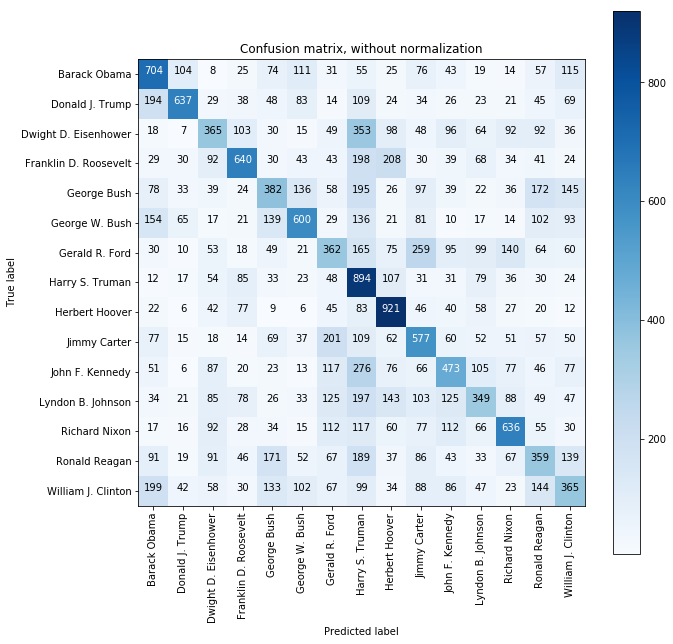

In [12]:
# from scikit-learn examples @
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html 
%matplotlib inline
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y_collapsed, pred_y_collapsed)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=(sorted(labels, key=labels.get)),
                      title='Confusion matrix, without normalization')

# #Plot normalized confusion matrix
# plt.figure(figsize=(10,10))
# plot_confusion_matrix(cnf_matrix, classes=(sorted(labels, key=labels.get)), normalize=True,
#                       title='Normalized confusion matrix')

plt.show()